### Bag of words(BOW)

In [8]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
    document = document.replace('.', '')
    tokenized_document = okt.morphs(document)

    word_to_index = {}
    bow = []

    for word in tokenized_document:
        if word not in word_to_index.keys(): # 단어가 처음 나왔을 경우
            word_to_index[word] = len(word_to_index)
            bow.insert(len(word_to_index) - 1, 1)
        else:                                # 단어가 다시 나왔을 경우
            index = word_to_index.get(word)
            bow[index] += 1

    return word_to_index, bow

doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)

print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [9]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'
vocab, bow = build_bag_of_words(doc2)

print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [10]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)

print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


#### BOW-CountVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer # 띄어쓰기만으로 토큰화 진행 <- 한국어에는 적합하지 않음

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

print('bag of words vector :', vector.fit_transform(corpus).toarray()) # 빈도수 기록
print('vocabulary :', vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


#### BOW-불용어 제거(사용자 정의 불용어)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [17]:
text = ["Family is not an important thing. It's everything"]
vect = CountVectorizer(stop_words = ['the', 'a', 'an', 'is', 'not'])

print('bag of words vector :', vect.fit_transform(text).toarray())
print('vocabulary :', vector.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


#### BOW-불용어 제거(CountVectorizer 포함된 불용어)

In [18]:
text = ["Family is not an important thing. It's everything"]
vect = CountVectorizer(stop_words = "english")

print('bag of words vector :', vect.fit_transform(text).toarray())
print('vocabulary :', vector.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


#### BOW-불용어 제거(NLTK 포함된 불용어)

In [22]:
text = ["Family is not an important thing. It's everything"]
stop_words = stopwords.words("english")

vect = CountVectorizer(stop_words = stop_words)
print('bag of words vector :', vect.fit_transform(text).toarray())
print('vocabulary :', vector.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


### 문서 단어 행렬(Document-Term Matrix, DTM)

#### 데이터 다운로드

In [ ]:
wget -c https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx # 코랩에 다운로드

In [23]:
!pip install wget # 로컬에 다운로드

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=2ec2f83f5f15f056ac3423893389cc4111e1e85fc40e8012ecd48da63e5a77ec
  Stored in directory: /home/jeon2/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [24]:
import wget

wget.download('https://raw.githubusercontent.com/euphoris/datasets/master/imdb.xlsx')

'imdb.xlsx'

In [26]:
!pwd
!ls

/mnt/FE0A5E240A5DDA6B/workspace/practice/NLP
 2016-10-20.txt
'22-10-25 Text Analytics_Tokenizer 1.ipynb'
'22-10-26 Text Analytics_Tokenizer 2.ipynb'
'22-10-27 Natural Language Processing_BOW.ipynb'
'22-10-27 Text Analytics_Tokenizer 3.ipynb'
 imdb.xlsx
 한국어불용어100.txt


#### 데이터 열기

In [27]:
import pandas as pd

df = pd.read_excel('imdb.xlsx', index_col=0)

In [28]:
df.head() # sentiment는 감성분석(긍정/부정)

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [29]:
df.shape

(748, 2)

#### TDM(Term Document Matirx, 단어문서행렬) 만들기

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500, stop_words = 'english') # max_features: 빈도순으로 단어 최대 500개까지 포함

In [31]:
tdm = cv.fit_transform(df['review']) # 기존 리뷰를 1% 미만으로 압축
tdm

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [34]:
print(343400 / (748*500)) # 압축한 뒤의 %
print(748*500) # 기존

0.9181818181818182
374000


In [35]:
tdm.shape

(748, 500)

#### 단어 목록

In [38]:
cv.get_feature_names()[:10] # 단어 목록을 볼 때는 tdm이 아니라 cv에 저장되어 있음

['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

In [39]:
len(cv.get_feature_names())

/home/jeon2/anaconda3/envs/study/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


500

In [45]:
tdm.sum(axis = 0) # 단어별 총 빈도

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [47]:
tdm.sum(axis = 1) # 문서별 총 단어 수

matrix([[  5],
        [  5],
        [ 12],
        [  3],
        [  6],
        [  7],
        [  2],
        [  7],
        [  2],
        [  2],
        [  1],
        [  4],
        [  3],
        [  1],
        [  5],
        [  5],
        [  6],
        [ 10],
        [  3],
        [229],
        [  5],
        [  2],
        [  5],
        [  3],
        [  1],
        [  2],
        [  4],
        [  2],
        [  7],
        [  3],
        [  1],
        [  0],
        [  1],
        [  3],
        [  4],
        [  6],
        [  3],
        [  6],
        [ 11],
        [  3],
        [  4],
        [  3],
        [  2],
        [  0],
        [  0],
        [  6],
        [  4],
        [  3],
        [  1],
        [  8],
        [  5],
        [  5],
        [  2],
        [  2],
        [  4],
        [  5],
        [  5],
        [  1],
        [  2],
        [  4],
        [  3],
        [  4],
        [  0],
        [  1],
        [  2],
        [  3],
        [ 

In [48]:
word_count = pd.DataFrame({
    '단어' : cv.get_feature_names(),
    '빈도' : tdm.sum(axis=0).flat
})

/home/jeon2/anaconda3/envs/study/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
type(tdm.sum(axis = 0))

numpy.matrix

In [49]:
word_count[:15]

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3
5,acting,43
6,action,7
7,actor,10
8,actors,19
9,actress,3


In [51]:
word_count.sort_values('빈도', ascending = False).head()

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58


#### 단어 빈도 저장

In [52]:
word_count.to_csv('word_count.csv')

In [53]:
!ls

 2016-10-20.txt
'22-10-25 Text Analytics_Tokenizer 1.ipynb'
'22-10-26 Text Analytics_Tokenizer 2.ipynb'
'22-10-27 Natural Language Processing_BOW.ipynb'
'22-10-27 Text Analytics_Tokenizer 3.ipynb'
 imdb.xlsx
 word_count.csv
 한국어불용어100.txt


### 단어 구름(wordcloud)

#### wordcloud 설치

In [54]:
!conda install -y -c conda-forge wordcloud

Solving environment: done

## Package Plan ##

  environment location: /home/jeon2/anaconda3/envs/study

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.8.2.2          |  py310h5764c6d_1         184 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         184 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.8.2.2-py310h5764c6d_1 None



wordcloud-1.8.2.2    | 184 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done


In [55]:
import wordcloud

wordcloud.__version__

'1.8.2.2'

#### 데이터 불러오기

In [56]:
import pandas as pd

word_count = pd.read_csv('word_count.csv', index_col = 0)
word_count.head()

,단어,빈도
0,10,29
1,20,3
2,90,6
3,absolutely,9
4,acted,3


#### 단어 구름

In [58]:
from wordcloud import WordCloud

#font_path: 글꼴의 경로
#max_words: 워드클라우드를 그릴 단어의 개수
#background_color: 배경색 설정
#width : 가로크기(픽셀 단위)
#height: 세로크기(픽셀 단위)
#배경은 흰색, 최대 100단어를 가로 400픽셀, 세로 300픽셀 크기로 단어 구름으로 그린다.

wc = WordCloud(background_color='white', max_words=100, width=400, height=300)

In [61]:
word_count.set_index('단어')

,빈도
단어,
10,29
20,3
90,6
absolutely,9
acted,3
...,...
wrong,3
year,5
years,14


In [62]:
word_count.set_index('단어')['빈도']

단어
10            29
20             3
90             6
absolutely     9
acted          3
              ..
wrong          3
year           5
years         14
yes            3
young          4
Name: 빈도, Length: 500, dtype: int64

In [64]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

count_dic

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

In [65]:
word_count['단어'], word_count['빈도']

dict(zip(word_count['단어'], word_count['빈도']))

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

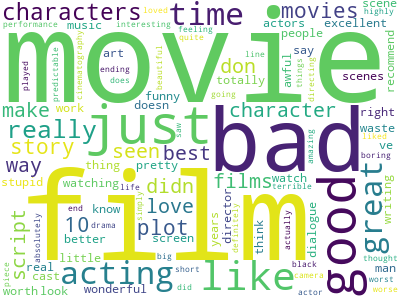

In [66]:
cloud = wc.fit_words(count_dic)

cloud.to_image()

In [67]:
cloud.to_file('cloud.png')

In [68]:
!ls

 2016-10-20.txt					   cloud.png
'22-10-25 Text Analytics_Tokenizer 1.ipynb'	   imdb.xlsx
'22-10-26 Text Analytics_Tokenizer 2.ipynb'	   word_count.csv
'22-10-27 Natural Language Processing_BOW.ipynb'   한국어불용어100.txt
'22-10-27 Text Analytics_Tokenizer 3.ipynb'


In [69]:
import os

os.getcwd()

'/mnt/FE0A5E240A5DDA6B/workspace/practice/NLP'

### TF-IDF(Term Frequency-Inverse Document Frequency)
: 카운트 기반의 단어 표현

#### 데이터 불러오기

In [75]:
import pandas as pd

df = pd.read_excel('imdb.xlsx', index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500, stop_words='english')

In [79]:
tdm = tfidf.fit_transform(df['review'])

In [83]:
print(tdm)

  (0, 264)	0.43676152065842583
  (0, 499)	0.5112421488050499
  (0, 284)	0.23148088751652843
  (0, 286)	0.5112421488050499
  (0, 385)	0.48261672511123166
  (1, 185)	0.4508252485652821
  (1, 27)	0.4630757536620436
  (1, 61)	0.330043211383874
  (1, 253)	0.4775650258680224
  (1, 417)	0.4952984618525245
  (2, 293)	0.3326996842333155
  (2, 242)	0.30667834544717537
  (2, 319)	0.24142314513946203
  (2, 321)	0.3140711939059074
  (2, 5)	0.22041303500891976
  (2, 354)	0.32260561111952785
  (2, 108)	0.3140711939059074
  (2, 54)	0.2890474338764623
  (2, 71)	0.32260561111952785
  (2, 475)	0.30015739096222105
  (2, 43)	0.2943241984036562
  (2, 284)	0.15064019733663225
  (3, 394)	0.6747516922530598
  (3, 287)	0.5316526285937699
  (3, 244)	0.5119137000618044
  :	:
  (739, 146)	1.0
  (740, 9)	0.83021432552157
  (740, 182)	0.5574443234070687
  (741, 250)	0.6167137686897145
  (741, 481)	0.4797072301038725
  (741, 405)	0.4694360111750707
  (741, 239)	0.41130880407139175
  (742, 284)	1.0
  (743, 46)	0.59810

In [84]:
word_count = pd.DataFrame({
    '단어' : cv.get_feature_names(),
    'tf-idf' : tdm.sum(axis=0).flat
})

word_count.sort_values('tf-idf', ascending=False).head()

/home/jeon2/anaconda3/envs/study/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,단어,tf-idf
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656
